ValueError: 'color' kwarg must be an color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

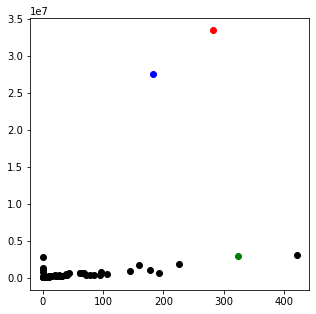

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [421,226,160,177,0,144,96,0,0,193,69,0,61,43,62,65,107,39,94,79,71,26,40,85,20,39,24,10,32,21,15,21,12,10,11,29,30,6,10,2,9,0,8,4,6,9,5,9,2,0,0,3,1,2,0],
    'y': [3137469,1886956.1,1731910.4,1093350.7,2861542.7,897123.5,813513.6,1318247.1,1135638.8,698458.2,644841.4,751511.5,616333.3,599607.7,595558.7,587711,554211,541550.6,428338.6,390283.9,380854.9,380137.9,377104.3,366189.9,347306.1,332082.1,285640.4,263856.8,251604.5,246308.9,230968.2,214671.2,206058.1,194788.7,188501.4,177614.6,173142.5,133180.9,127036.5,118779.9,104001.5,97281.7,88595,80911,78189.5,75415.5,67518.6,63541.1,57036.8,55406.1,53305.7,52169.1,39646.2,34785.1,146194.3]
})


np.random.seed(200)
k = 5
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 500), np.random.randint(0, 35000000)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'p',5:'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 500)
plt.ylim(0, 3500000)
plt.show()

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = df = pd.DataFrame({
    'x': [421,226,160,177,0,144,96,0,0,193,69,0,61,43,62,65,107,39,94,79,71,26,40,85,20,39,24,10,32,21,15,21,12,10,11,29,30,6,10,2,9,0,8,4,6,9,5,9,2,0,0,3,1,2,0],
    'y': [3137469,1886956.1,1731910.4,1093350.7,2861542.7,897123.5,813513.6,1318247.1,1135638.8,698458.2,644841.4,751511.5,616333.3,599607.7,595558.7,587711,554211,541550.6,428338.6,390283.9,380854.9,380137.9,377104.3,366189.9,347306.1,332082.1,285640.4,263856.8,251604.5,246308.9,230968.2,214671.2,206058.1,194788.7,188501.4,177614.6,173142.5,133180.9,127036.5,118779.9,104001.5,97281.7,88595,80911,78189.5,75415.5,67518.6,63541.1,57036.8,55406.1,53305.7,52169.1,39646.2,34785.1,146194.3]
})
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [5]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = df = pd.DataFrame({
    'x': [421,226,160,177,0,144,96,0,0,193,69,0,61,43,62,65,107,39,94,79,71,26,40,85,20,39,24,10,32,21,15,21,12,10,11,29,30,6,10,2,9,0,8,4,6,9,5,9,2,0,0,3,1,2,0],
    })
df = DataFrame(Data,columns=['x'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[136.1       ]
 [ 18.77272727]
 [421.        ]]


KeyError: 'y'

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the f

ModuleNotFoundError: No module named 'yellowbrick'

In [8]:

from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse
